In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
import cvxopt as opt
from cvxopt import blas, solvers
import os
%matplotlib inline
%env ALPHAVANTAGE_API_KEY = NTN3D6P6LIMZ6A2Q#alpha advantage api key

env: ALPHAVANTAGE_API_KEY=NTN3D6P6LIMZ6A2Q#alpha advantage api key


In [2]:
#choose the tickers of the PTF
ptf = ['AAPL','MSFT','KO','JNJ','XOM']
ptf_df = pd.DataFrame()

In [3]:
#donwload adj-close data from the alphaadvantage api
for stock in ptf:
    ptf_df[stock] = web.DataReader(stock, "av-daily-adjusted", 
                                        start=datetime(2015,1, 1), 
                                        end=datetime(2021, 1, 16),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))['adjusted close']

In [5]:
ptf = ['BB','LMT','MELI','GOOGL','PYPL']
for stock in ptf:
    ptf_df[stock] = web.DataReader(stock, "av-daily-adjusted", 
                                        start=datetime(2015,1, 1), 
                                        end=datetime(2021, 1, 16),api_key=os.getenv('ALPHAVANTAGE_API_KEY'))['adjusted close']

In [6]:
ptf_df.head(10)

AAPL       MSFT         KO        JNJ        XOM      BB  \
2015-01-02  24.859222  41.446001  34.335313  88.146122  69.615496  10.820   
2015-01-05  24.158898  41.060437  34.335313  87.530482  67.710688  10.760   
2015-01-06  24.161172  40.462146  34.596046  87.100377  67.350724  10.620   
2015-01-07  24.499965  40.976233  35.027886  89.023198  68.033156  10.670   
2015-01-08  25.441309  42.181677  35.451577  89.723171  69.165542  10.625   
2015-01-09  25.468595  41.827134  35.060477  88.500325  69.068052  10.380   
2015-01-12  24.841032  41.304184  34.742709  88.196722  67.740685  10.120   
2015-01-13  25.061588  41.087027  34.734561  88.348524  67.493210   9.710   
2015-01-14  24.966090  40.732485  34.677525  87.707584  67.298230  12.595   
2015-01-15  24.288504  40.311466  34.530863  86.434137  66.713288  10.105   

                   LMT        MELI   GOOGL  PYPL  
2015-01-02  163.421091  124.592088  529.55   NaN  
2015-01-05  160.022649  123.057581  519.46   NaN  
2015-01-06  159.270258  120.859771  506.64   NaN  
2015-01-07  161.324540  120.622170  505.15   NaN  
2015-01-08  164.959689  122.423978  506.91   NaN  
2015-01-09  164.866697  121.067672  500.72   NaN  
2015-01-12  164.401736  119.077762  497.06   NaN  
2015-01-13  164.300290  118.780761  501.80   NaN  
2015-01-14  163.353460  117.345254  505.93   NaN  
2015-01-15  162.626430  115.721647  504.01   NaN

In [7]:
#calculate the cumulative returns
cum_returns_df = ptf_df.apply(lambda x: (x/x[0]))
cum_returns_df.head()

AAPL      MSFT        KO       JNJ       XOM        BB  \
2015-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-01-05  0.971828  0.990697  1.000000  0.993016  0.972638  0.994455   
2015-01-06  0.971920  0.976262  1.007594  0.988136  0.967467  0.981516   
2015-01-07  0.985548  0.988666  1.020171  1.009950  0.977270  0.986137   
2015-01-08  1.023415  1.017750  1.032511  1.017891  0.993537  0.981978   

                 LMT      MELI     GOOGL  PYPL  
2015-01-02  1.000000  1.000000  1.000000   NaN  
2015-01-05  0.979204  0.987684  0.980946   NaN  
2015-01-06  0.974600  0.970044  0.956737   NaN  
2015-01-07  0.987171  0.968137  0.953923   NaN  
2015-01-08  1.009415  0.982598  0.957247   NaN

In [8]:
#import plotly
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

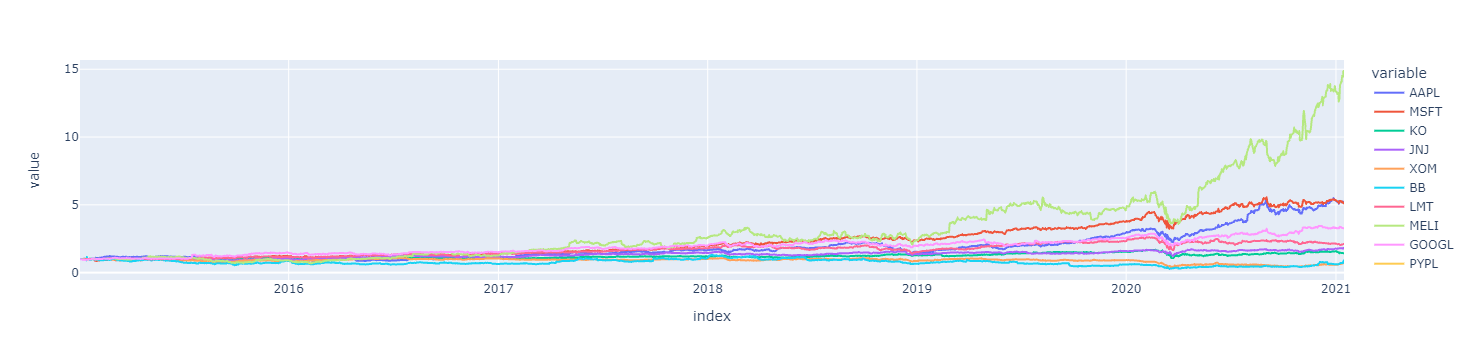

In [9]:
fig = px.line(cum_returns_df, x=cum_returns_df.index, y=cum_returns_df.columns)
fig.show()

In [25]:
#compute daily log returns
log_returns = pd.DataFrame()
for stocks in ptf_df:
    log_returns[stocks] = np.log(ptf_df[stocks] / ptf_df[stocks].shift(1)).dropna()
log_returns =log_returns.dropna()

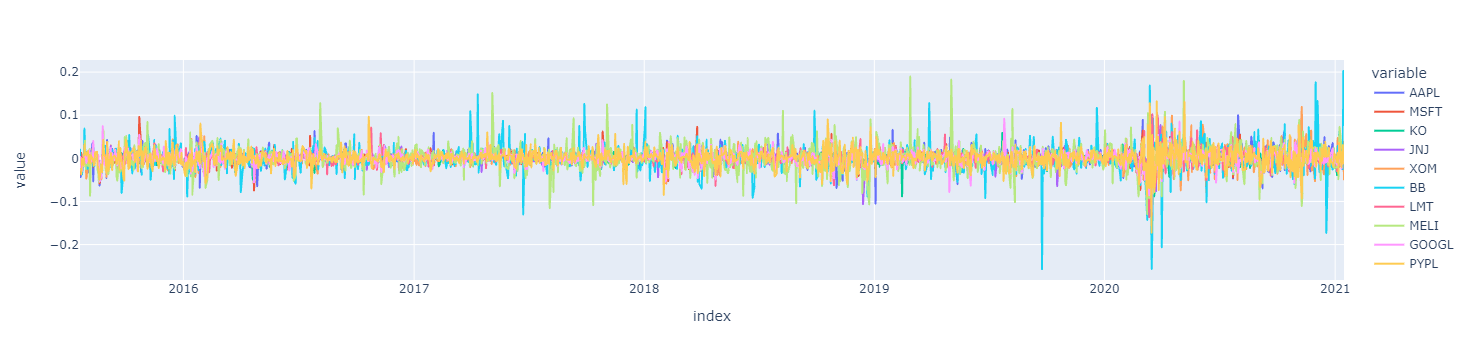

In [26]:
fig = px.line(log_returns, x=log_returns.index, y=log_returns.columns)
fig.show()

In [27]:
log_returns.describe()

AAPL         MSFT           KO          JNJ          XOM  \
count  1384.000000  1384.000000  1384.000000  1384.000000  1384.000000   
mean      0.001036     0.001168     0.000248     0.000447    -0.000202   
std       0.019057     0.017546     0.012521     0.012430     0.018131   
min      -0.137708    -0.159453    -0.101728    -0.105781    -0.130391   
25%      -0.006533    -0.005991    -0.004517    -0.004307    -0.007763   
50%       0.000895     0.001185     0.000462     0.000601     0.000000   
75%       0.010030     0.009119     0.005745     0.005979     0.007249   
max       0.113157     0.132929     0.062783     0.076940     0.119442   

                BB          LMT         MELI        GOOGL         PYPL  
count  1384.000000  1384.000000  1384.000000  1384.000000  1384.000000  
mean      0.000179     0.000485     0.001889     0.000660     0.001286  
std       0.030406     0.015078     0.028941     0.016666     0.021422  
min      -0.256655    -0.136526    -0.136541    -0.123685    -0.172259  
25%      -0.012621    -0.005570    -0.011768    -0.006054    -0.008876  
50%      -0.000984     0.000887     0.001727     0.001188     0.001354  
75%       0.012680     0.006954     0.017018     0.009140     0.012260  
max       0.202502     0.101906     0.189719     0.091852     0.131991

In [28]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [29]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [30]:
#return_vec is a numpy ndarray with n_assets and n_obs
#transform the dataframe with stocks as columns as numpy array
#results are stacked
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(log_returns.transpose().to_numpy()) 
    for _ in range(n_portfolios)
])

In [31]:
log_returns.transpose().to_numpy()

array([[-0.01004498, -0.04321491, -0.00047927, ...,  0.01609646,
        -0.01524279, -0.01382564],
       [ 0.00764335, -0.03749631,  0.01243879, ...,  0.00653885,
        -0.01546519, -0.00173844],
       [-0.00460216, -0.00706545, -0.00146807, ...,  0.00099731,
        -0.0187147 , -0.01082416],
       ...,
       [-0.01591663,  0.00148445, -0.01276375, ..., -0.00659596,
         0.02977167, -0.00040493],
       [ 0.00361622, -0.0003596 , -0.02974311, ...,  0.00563611,
        -0.00939006, -0.00190832],
       [-0.02806498, -0.02469897, -0.03660886, ...,  0.03009304,
        -0.01166433, -0.00942209]])

In [32]:
#create a df in order to handle data better
df_test = pd.DataFrame(columns=['means','stds'])
for i in range(500):
    df_test.loc[i] = [means[i][0], stds[i][0] ] 

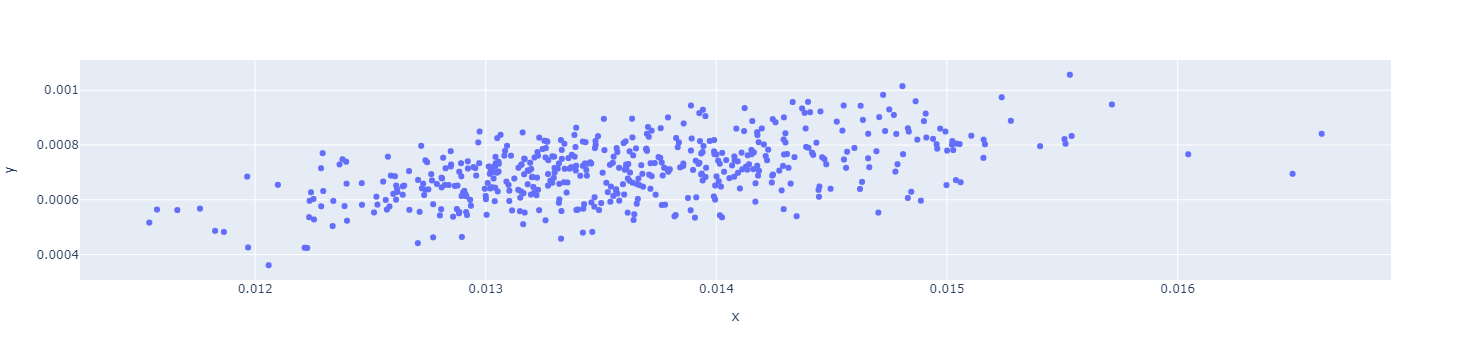

In [33]:
fig = px.scatter(x=df_test.stds.values, y=df_test.means.values)
fig.show()


In [34]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [35]:
#return_vec is a numpy ndarray with n_assets and n_obs
weights, returns, risks = optimal_portfolio(log_returns.transpose().to_numpy())

     pcost       dcost       gap    pres   dres
 0: -7.1391e-04 -1.0019e+00  1e+00  0e+00  3e+00
 1: -7.1459e-04 -1.1872e-02  1e-02  2e-16  4e-02
 2: -7.7196e-04 -1.9702e-03  1e-03  2e-16  4e-03
 3: -1.6135e-03 -2.5432e-03  9e-04  2e-16  2e-03
 4: -1.8129e-03 -1.8538e-03  4e-05  3e-16  9e-05
 5: -1.8465e-03 -1.8469e-03  4e-07  3e-16  9e-07
 6: -1.8468e-03 -1.8468e-03  4e-09  3e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1281e-04 -1.0019e+00  1e+00  0e+00  3e+00
 1: -7.1350e-04 -1.1870e-02  1e-02  2e-16  4e-02
 2: -7.7078e-04 -1.9680e-03  1e-03  1e-16  4e-03
 3: -1.6129e-03 -2.5412e-03  9e-04  4e-16  2e-03
 4: -1.8081e-03 -1.8487e-03  4e-05  2e-16  9e-05
 5: -1.8414e-03 -1.8418e-03  4e-07  1e-16  9e-07
 6: -1.8417e-03 -1.8417e-03  4e-09  4e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1158e-04 -1.0019e+00  1e+00  2e-16  3e+00
 1: -7.1226e-04 -1.1867e-02  1e-02  4e-17  4e-02
 2: -7.6947e-04 -1.9655e

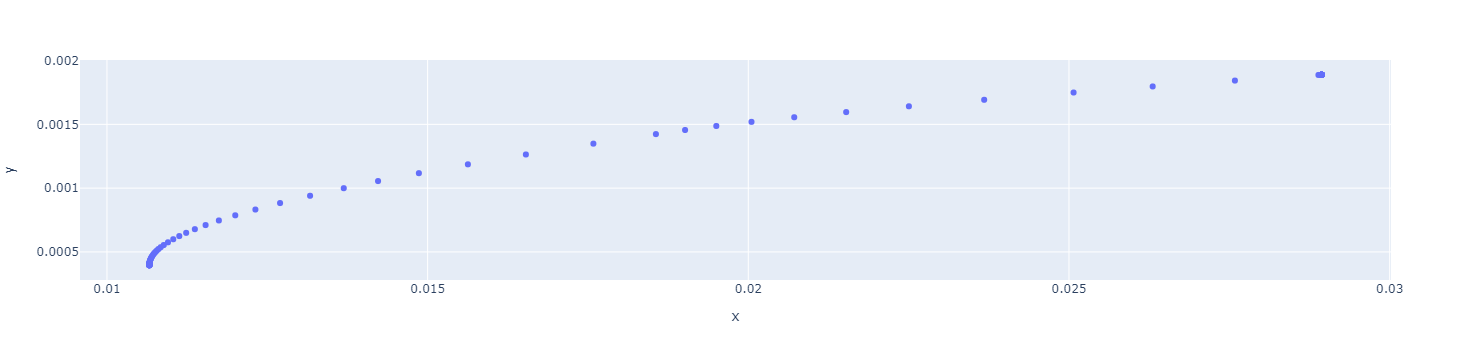

In [36]:
fig = px.scatter(x=risks, y=returns)
fig.show()

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.stds.values, y=df_test.means.values, mode='markers',name='markers'))
fig.add_trace(go.Scatter(x=risks, y=returns, mode='lines',name='Efficient Frontier'))
fig.update_layout(
    title="Markowitz Portfolio Optimization",
    xaxis_title="Std",
    yaxis_title="Mean" )
fig.show()